Project objective: 

The goal of this project is to build a model that can predict the probability of heart disease occurrence, based on a combination of features that describes the disease. In order to achieve the goal, we used data sets that was collected by Cleveland Clinic Foundation in Switzerland.
The dataset used in this project is part of a database contains 14 features from Cleveland Clinic Foundation for heart disease. The dataset shows different levels of heart disease presence from 1 to 4 and 0 for the absence of the disease. We have 303 rows of people data with 13 continuous observation of different symptoms.
We have developed two algorithms using linear regression and decision trees, on Cleveland dataset.

Import libraries

In [21]:
import pandas as pnd
import numpy as np
from sklearn import preprocessing
from sklearn import neighbors, datasets,linear_model
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import svm
import operator
import warnings
from sklearn.model_selection import train_test_split,cross_val_score

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn import tree
import seaborn as sns

from IPython.display import Image

%matplotlib inline

 function defining

In [118]:
# function for confusion matrix building
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    

def visualize_tree(tr, feature_names):
    with open("dt.dot", 'w') as f:
        tree.export_graphviz(tr, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]

Problem Statement:
A set of disease-predicting parameters is decided upon based on observed correlation with disease diagnosis (heart diseases in our case), where n is the number of such parameters.
We also have a set of N patients that have been diagnosed with heart disease or not, and the dataset consists of the parameter readings. where is a set of weights for each of the n disease-predicting parameters (to be determined by fitting the dataset to the model).
The models are aiming to predict the probability that a given patient x will be diagnosed as heart disease, and predict the weights of the features on finding the probability. When our data was a small data sets, then we hope that the model will fit the data without the risk of overfitting.  


Dataset Description:
The dataset used in this project is part of a database contains 14 features from Cleveland Clinic Foundation for heart disease. The dataset shows different levels of heart disease presence from 1 to 4 and 0 for the absence of the disease. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1, 2, 3, 4) from absence (value 0). We have 303 rows of people data with 13 continuous observation of different symptoms. 


In [23]:
header_row = ['age','sex','chest_pain','blood pressure','serum_cholestoral','fasting_blood_sugar',\
               'electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal','diagnosis']

# read csv file with Cleveland heart diseases data
heart = pnd.read_csv(r'C:\Users\User\Desktop\dem\original_datasets\processed.cleveland.data.csv', names=header_row)
heart[:5]

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [24]:
len(heart)

303

As shown above, we have 303 rows of people data with 13 continous observation of different symptoms. 

Features Description:
1. Age :- Age in years 
2. Sex :- 1 for male; 0 for female     
3. Chest pain type :- Value1: typical angina. Value2: atypical angina. Value3: non-anginal pain. Value4: asymptomatic
4. Resting blood pressure :- In mm hg on admission to the hospital
5. Serum cholesterol :- In mg/dI 
6. Fasting blood sugar ( > 120 mg/dI) :- for true; 0 for false 
7. Resting electrocardiographic results :- Value0: normal; Value1: having ST-T wave abnormality (T-wave inversions and/or ST  elevation or depression of > 0.05 mV); Value2: showing probable or definite left ventricular hypertrophy by Estes’s criteria 
8. Maximum heart rate achieved :- centered        
9. Exercise-induced angina :- 1 for yes; 0 for no  
10. ST depression induced by exercise relative to rest :- In mm Hg on admission to the hospital 
11. Number of major vessels :- (0-3) colored by fluoroscopy 
12. The slope of the peak exercise ST segment :- Value1: upsloping; Value2: flat; Value3: downsloping 
13. Thallium heart scan :- 3 for normal; 6 for fixed defect; 7 for reversible defect
14. Diagnosis heart disease (angiographic disease) :- Value0: no disease; Value1: heart disease  

Data Exploration

In [25]:
# get statistics values
heart.describe()

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,diagnosis
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [27]:
# get number of people with symptom X_k
names_descr = dict()
categorical_columns = ["sex", "chest_pain", "fasting_blood_sugar", "electrocardiographic", "induced_angina", "slope", "vessels", \
                       "thal", "diagnosis"]
for c in categorical_columns:
    print (heart.groupby([c])["age"].count())

sex
0.0     97
1.0    206
Name: age, dtype: int64
chest_pain
1.0     23
2.0     50
3.0     86
4.0    144
Name: age, dtype: int64
fasting_blood_sugar
0.0    258
1.0     45
Name: age, dtype: int64
electrocardiographic
0.0    151
1.0      4
2.0    148
Name: age, dtype: int64
induced_angina
0.0    204
1.0     99
Name: age, dtype: int64
slope
1.0    142
2.0    140
3.0     21
Name: age, dtype: int64
vessels
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: age, dtype: int64
thal
3.0    166
6.0     18
7.0    117
?        2
Name: age, dtype: int64
diagnosis
0    164
1     55
2     36
3     35
4     13
Name: age, dtype: int64


Here we can see how many people which symptom have

 preprocess the data, to change the missing data into mean value, using simple mean imputation methods

In [28]:
# we have unknown values '?'
# change unrecognized value '?' into mean value through the column
for c in heart.columns[:-1]:
    heart[c] = heart[c].apply(lambda x: heart[heart[c]!='?'][c].astype(float).mean() if x == "?" else x)
    heart[c] = heart[c].astype(float)
    

Heart disease types discovering

In [32]:
# print the types of heart disease
set(heart.loc[:, "diagnosis"].values)

{0, 1, 2, 3, 4}

 0 - no disease
 1,2,3,4 - types of disease by severity in ascending

In [33]:
# let's calculate similarities between 1,2,3,4 levels 
# we will use euclidean distance 
vecs_1 = heart[heart["diagnosis"] == 1 ].median().values[:-2]
vecs_2 = heart[heart["diagnosis"] == 2 ].median().values[:-2]
vecs_3 = heart[heart["diagnosis"] == 3 ].median().values[:-2]
vecs_4 = heart[heart["diagnosis"] == 4 ].median().values[:-2]

In [34]:
vecs_1

array([ 57. ,   1. ,   4. , 130. , 249. ,   0. ,   2. , 150. ,   0. ,
         0.8,   2. ,   1. ])

In [36]:
print ("Similarity between type 1 and type 2 is ", np.linalg.norm(vecs_1-vecs_2))
print ("Similarity between type 1 and type 3 is ", np.linalg.norm(vecs_1-vecs_3))
print ("Similarity between type 1 and type 4 is ", np.linalg.norm(vecs_1-vecs_4))
print ("Similarity between type 2 and type 3 is ", np.linalg.norm(vecs_2-vecs_3))
print ("Similarity between type 2 and type 4 is ", np.linalg.norm(vecs_2-vecs_4))
print ("Similarity between type 3 and type 4 is ", np.linalg.norm(vecs_3-vecs_4))

Similarity between type 1 and type 2 is  10.383159442096611
Similarity between type 1 and type 3 is  21.283796653792763
Similarity between type 1 and type 4 is  29.76390431378249
Similarity between type 2 and type 3 is  13.077079184588582
Similarity between type 2 and type 4 is  27.939935576160515
Similarity between type 3 and type 4 is  29.521009467834936


In [37]:
sim = {"(1,2)": np.linalg.norm(vecs_1-vecs_2), \
       "(1,3)": np.linalg.norm(vecs_1-vecs_3),\
       "(1,4)": np.linalg.norm(vecs_1-vecs_4),\
       "(2,3)": np.linalg.norm(vecs_2-vecs_3),\
       "(2,4)": np.linalg.norm(vecs_2-vecs_4),\
       "(3,4)": np.linalg.norm(vecs_3-vecs_4)    
      }

In [39]:
# sort by the closest types
sorted_sim = sorted(sim.items(), key=operator.itemgetter(1))
sorted_sim

[('(1,2)', 10.383159442096611),
 ('(2,3)', 13.077079184588582),
 ('(1,3)', 21.283796653792763),
 ('(2,4)', 27.939935576160515),
 ('(3,4)', 29.521009467834936),
 ('(1,4)', 29.76390431378249)]

 We can see that the mild forms of disease are more similar than 4 type of heart disease and others

In [40]:
# we can compare the types of heart disease by using values of each feature separately 

heart_d = heart[heart["diagnosis"] >= 1 ]
heart_d[:5]

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


 Let's find the ranges of each feature by disease type 

 1. Age

In [42]:
print ("Minimum age to Maximum age per disease type")

heart_d.groupby(["diagnosis", ])["age"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis", ])["age"].max().astype(str)

Minimum age to Maximum age per disease type


diagnosis
1    35.0, 70.0
2    42.0, 69.0
3    39.0, 70.0
4    38.0, 77.0
Name: age, dtype: object

In [43]:
print ("Mean age per disease type")
heart_d.groupby(["diagnosis", ])["age"].mean()

Mean age per disease type


diagnosis
1    55.381818
2    58.027778
3    56.000000
4    59.692308
Name: age, dtype: float64

 We can see that heart disease with type 3 can be present in lower age then type 2

2. Sex

In [44]:
print ("Count each sex per heart disease type")
heart_d.groupby(["diagnosis", "sex"])["age"].count()

Count each sex per heart disease type


diagnosis  sex
1          0.0     9
           1.0    46
2          0.0     7
           1.0    29
3          0.0     7
           1.0    28
4          0.0     2
           1.0    11
Name: age, dtype: int64

 We can see that heart disease all types can be present in men with higher probability than in women

3. chest_pain

In [45]:
print ("Count each chest pain value per heart disease type")
heart_d.groupby(["diagnosis", "chest_pain"])["age"].count()

Count each chest pain value per heart disease type


diagnosis  chest_pain
1          1.0            5
           2.0            6
           3.0            9
           4.0           35
2          1.0            1
           2.0            1
           3.0            4
           4.0           30
3          2.0            2
           3.0            4
           4.0           29
4          1.0            1
           3.0            1
           4.0           11
Name: age, dtype: int64

The people with chest pain = 4 often have heart disease.  

4. blood pressure

In [47]:
print ("Minimum blood pressure to Maximum  blood pressure per disease type")

heart_d.groupby(["diagnosis"])["blood pressure"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis"])["blood pressure"].max().astype(str)

Minimum blood pressure to Maximum  blood pressure per disease type


diagnosis
1    108.0, 192.0
2    100.0, 180.0
3    100.0, 200.0
4    112.0, 165.0
Name: blood pressure, dtype: object

In [49]:
print ("Mean blood pressure per disease type")
heart_d.groupby(["diagnosis", ])["blood pressure"].mean()

Mean blood pressure per disease type


diagnosis
1    133.254545
2    134.194444
3    135.457143
4    138.769231
Name: blood pressure, dtype: float64

As bigger is mean blood pressure as higher is type of heart disease

5. serum_cholestoral

In [50]:
print ("Minimum serum_cholestoral to Maximum serum_cholestoral per disease type")

heart_d.groupby(["diagnosis"])["serum_cholestoral"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis"])["serum_cholestoral"].max().astype(str)

Minimum serum_cholestoral to Maximum serum_cholestoral per disease type


diagnosis
1    149.0, 335.0
2    169.0, 409.0
3    131.0, 353.0
4    166.0, 407.0
Name: serum_cholestoral, dtype: object

In [51]:
print ("Mean serum_cholestoral per disease type")
heart_d.groupby(["diagnosis", ])["serum_cholestoral"].mean()

Mean serum_cholestoral per disease type


diagnosis
1    249.109091
2    259.277778
3    246.457143
4    253.384615
Name: serum_cholestoral, dtype: float64

6. fasting_blood_sugar

In [52]:
print ("Count each fasting_blood_sugar per heart disease type")
heart_d.groupby(["diagnosis", "fasting_blood_sugar"])["age"].count()

Count each fasting_blood_sugar per heart disease type


diagnosis  fasting_blood_sugar
1          0.0                    51
           1.0                     4
2          0.0                    27
           1.0                     9
3          0.0                    27
           1.0                     8
4          0.0                    12
           1.0                     1
Name: age, dtype: int64

7. electrocardiographic results

In [54]:
print ("Count each electrocardiographic per heart disease type")
heart_d.groupby(["diagnosis", "electrocardiographic"])["age"].count()

Count each electrocardiographic per heart disease type


diagnosis  electrocardiographic
1          0.0                     23
           2.0                     32
2          0.0                     19
           1.0                      1
           2.0                     16
3          0.0                     12
           1.0                      1
           2.0                     22
4          0.0                      2
           1.0                      1
           2.0                     10
Name: age, dtype: int64

 8. max_heart_rate

In [55]:
print ("Minimum max_heart_rate to Maximum max_heart_rate per disease type")

heart_d.groupby(["diagnosis"])["max_heart_rate"].min().astype(str) + ', ' +  heart_d.groupby(["diagnosis"])["max_heart_rate"].max().astype(str)

Minimum max_heart_rate to Maximum max_heart_rate per disease type


diagnosis
1     88.0, 195.0
2     71.0, 170.0
3     90.0, 173.0
4    114.0, 182.0
Name: max_heart_rate, dtype: object

In [57]:
print ("Mean max_heart_rate per disease type")
heart_d.groupby(["diagnosis", ])["max_heart_rate"].mean()

Mean max_heart_rate per disease type


diagnosis
1    145.927273
2    135.583333
3    132.057143
4    140.615385
Name: max_heart_rate, dtype: float64

 9. induced_angina

In [58]:
print ("Count  induced_angina per heart disease type")
heart_d.groupby(["diagnosis", "induced_angina"])["age"].count()

Count  induced_angina per heart disease type


diagnosis  induced_angina
1          0.0               30
           1.0               25
2          0.0               14
           1.0               22
3          0.0               12
           1.0               23
4          0.0                7
           1.0                6
Name: age, dtype: int64

10. ST_depression

In [60]:
print ("Count  mean ST_depression per heart disease type")
heart_d.groupby(["diagnosis"])["ST_depression"].mean()

Count  mean ST_depression per heart disease type


diagnosis
1    1.005455
2    1.780556
3    1.962857
4    2.361538
Name: ST_depression, dtype: float64

In [61]:
heart_d[:2]

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1


11. slope

In [62]:
print ("Count slope per heart disease type")
heart_d.groupby(["diagnosis", "slope"])["age"].count()

Count slope per heart disease type


diagnosis  slope
1          1.0      22
           2.0      31
           3.0       2
2          1.0       7
           2.0      26
           3.0       3
3          1.0       6
           2.0      24
           3.0       5
4          1.0       1
           2.0      10
           3.0       2
Name: age, dtype: int64

12. vessels

In [63]:
print ("Count  mean vessels per heart disease type")
heart_d.groupby(["diagnosis"])["vessels"].mean()

Count  mean vessels per heart disease type


diagnosis
1    0.739495
2    1.222222
3    1.457143
4    1.692308
Name: vessels, dtype: float64

13. thal

In [64]:
print ("Count  mean thal per heart disease type")
heart_d.groupby(["diagnosis"])["thal"].mean()

Count  mean thal per heart disease type


diagnosis
1    5.345455
2    5.992617
3    6.285714
4    6.230769
Name: thal, dtype: float64

 Conclusion from observing the data: 
 We can consider that the person with 

 age > 38
 man
 with chest pain = 4
 blood pressure > 112
 serum_cholestoral > 166
 fasting_blood_sugar = 0
 electrocardiographic = 2
 max_heart_rate > 114
 ST_depression about 2
 slope >=2
 vessels about 1.6
 thal more than 6
 is the most likely have 4 type of the heart disease

 Data preprocessing

 map dependent variable y = "diagnosis" into binary label

In [65]:
# if "diagnosis" == 0, member does not have disease A - we put 0
# if "diagnosis" >= 1, member possess the disease A - we put 1
heart.loc[:, "diag_int"] = heart.loc[:, "diagnosis"].apply(lambda x: 1 if x >= 1 else 0)

 normalize the data

In [66]:
# create the normalizer and fit it 
preprocessing.Normalizer().fit_transform(heart)

array([[0.19741527, 0.00313358, 0.00313358, ..., 0.01880145, 0.        ,
        0.        ],
       [0.19057465, 0.0028444 , 0.01137759, ..., 0.00853319, 0.0056888 ,
        0.0028444 ],
       [0.22578159, 0.00336987, 0.0134795 , ..., 0.02358912, 0.00336987,
        0.00336987],
       ...,
       [0.25334975, 0.00444473, 0.01777893, ..., 0.03111313, 0.0133342 ,
        0.00444473],
       [0.17495449, 0.        , 0.00613875, ..., 0.00920813, 0.00306938,
        0.00306938],
       [0.13346695, 0.00351229, 0.01053686, ..., 0.01053686, 0.        ,
        0.        ]])

Constructing the sample set

In [68]:
# split dataset into train and test
heart_train, heart_test, goal_train, goal_test = train_test_split(heart.loc[:,'age':'thal'], \
                                                 heart.loc[:,'diag_int'], test_size=0.33, random_state=0)  

In [69]:
# calculate the correlation between features

corr = heart.corr()
heart.corr()

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis,diag_int
age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359489,0.127368,0.222853,0.223120
sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.092891,0.379300,0.224469,0.276816
chest_pain,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.232332,0.264895,0.407075,0.414446
blood pressure,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098707,0.133534,0.157754,0.150825
serum_cholestoral,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.118525,0.014190,0.070909,0.085164
fasting_blood_sugar,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143967,0.070658,0.059186,0.025264
electrocardiographic,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127487,0.024449,0.183696,0.169202
max_heart_rate,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263408,-0.278530,-0.415040,-0.417167
induced_angina,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144722,0.328291,0.397057,0.431894
ST_depression,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294558,0.340549,0.504092,0.424510


In [70]:
#build heatmap

cmap = sns.diverging_palette(250, 10, n=3, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,diagnosis,diag_int
age,1,-0.098,0.1,0.28,0.21,0.12,0.15,-0.39,0.092,0.2,0.16,0.36,0.13,0.22,0.22
sex,-0.098,1,0.01,-0.064,-0.2,0.048,0.022,-0.049,0.15,0.1,0.038,0.093,0.38,0.22,0.28
chest_pain,0.1,0.01,1,-0.036,0.072,-0.04,0.068,-0.33,0.38,0.2,0.15,0.23,0.26,0.41,0.41
blood pressure,0.28,-0.064,-0.036,1,0.13,0.18,0.15,-0.045,0.065,0.19,0.12,0.099,0.13,0.16,0.15
serum_cholestoral,0.21,-0.2,0.072,0.13,1,0.0098,0.17,-0.0034,0.061,0.047,-0.0041,0.12,0.014,0.071,0.085
fasting_blood_sugar,0.12,0.048,-0.04,0.18,0.0098,1,0.07,-0.0079,0.026,0.0057,0.06,0.14,0.071,0.059,0.025
electrocardiographic,0.15,0.022,0.068,0.15,0.17,0.07,1,-0.083,0.085,0.11,0.13,0.13,0.024,0.18,0.17
max_heart_rate,-0.39,-0.049,-0.33,-0.045,-0.0034,-0.0079,-0.083,1,-0.38,-0.34,-0.39,-0.26,-0.28,-0.42,-0.42
induced_angina,0.092,0.15,0.38,0.065,0.061,0.026,0.085,-0.38,1,0.29,0.26,0.14,0.33,0.4,0.43
ST_depression,0.2,0.1,0.2,0.19,0.047,0.0057,0.11,-0.34,0.29,1,0.58,0.29,0.34,0.5,0.42


 Exploratory Visualization

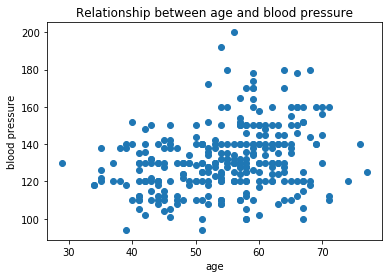

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("age")
plt.ylabel("blood pressure")

# define title
plt.title("Relationship between age and blood pressure")

# plot
plt.scatter(heart['age'], heart['blood pressure'])
plt.show()

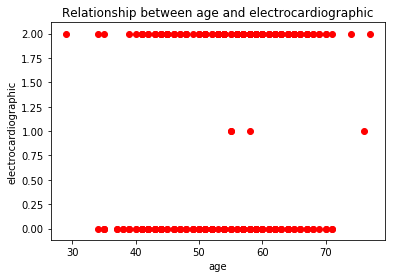

In [72]:
plt.xlabel("age")
plt.ylabel("electrocardiographic")

# define title
plt.title("Relationship between age and electrocardiographic")

# plot
plt.scatter(heart['age'], heart['electrocardiographic'], color = 'red')
plt.show()

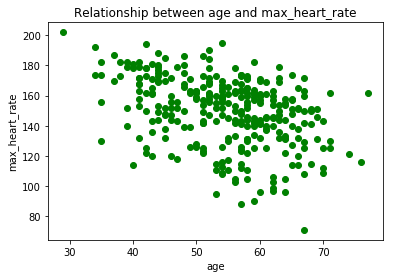

In [73]:
plt.xlabel("age")
plt.ylabel("max_heart_rate")

# define title
plt.title("Relationship between age and max_heart_rate")

# plot
plt.scatter(heart['age'], heart['max_heart_rate'], color = 'green')
plt.show()

 correlation search

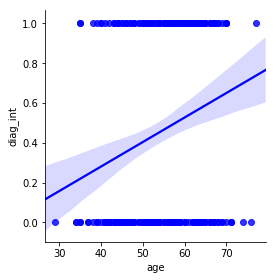

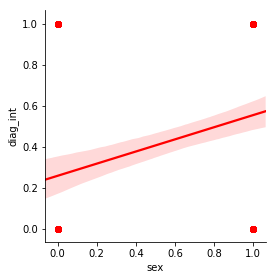

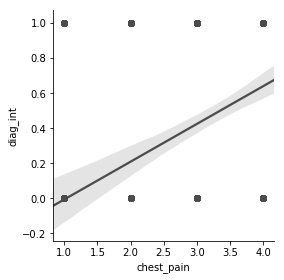

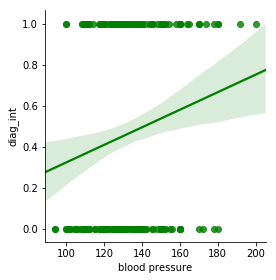

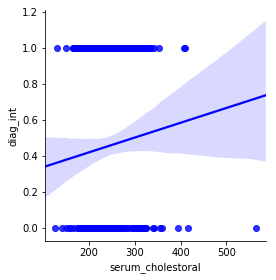

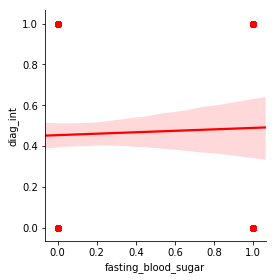

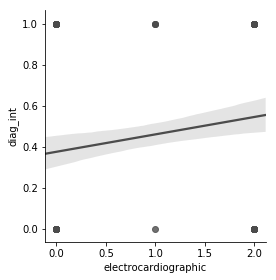

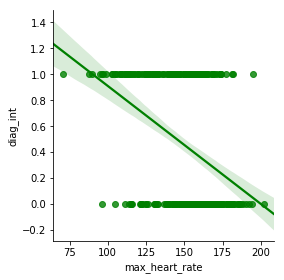

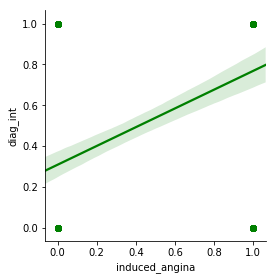

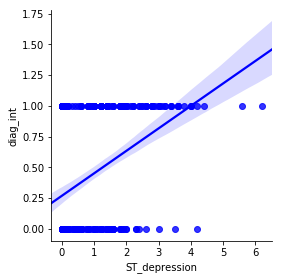

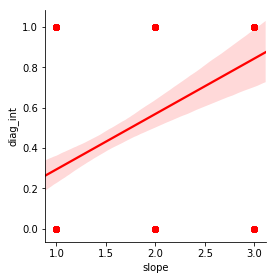

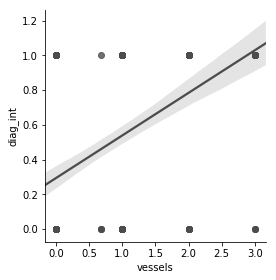

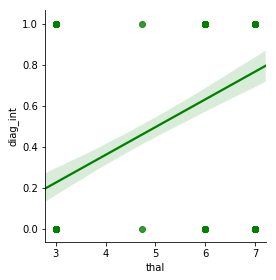

In [77]:
# search by the correlation between dependent variable and each feature
warnings.filterwarnings('ignore')
df = heart
g1 = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["age"], size=4)
g1.map(sns.regplot, color="blue")

g2 = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["sex"], size=4)
g2.map(sns.regplot, color="red")

g = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["chest_pain"], size=4)
g.map(sns.regplot, color="0.3")

gg = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["blood pressure"], size=4)
gg.map(sns.regplot, color="green")

g1 = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["serum_cholestoral"], size=4)
g1.map(sns.regplot, color="blue")

g2 = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["fasting_blood_sugar"], size=4)
g2.map(sns.regplot, color="red")

g = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["electrocardiographic"], size=4)
g.map(sns.regplot, color="0.3")

gg = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["max_heart_rate"], size=4)
gg.map(sns.regplot, color="green")

gg = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["induced_angina"], size=4)
gg.map(sns.regplot, color="green")

g1 = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["ST_depression"], size=4)
g1.map(sns.regplot, color="blue")

g2 = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["slope"], size=4)
g2.map(sns.regplot, color="red")

g = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["vessels"], size=4)
g.map(sns.regplot, color="0.3")

gg = sns.PairGrid(df, y_vars=["diag_int"], x_vars=["thal"], size=4)
gg.map(sns.regplot, color="green")

From the charts above we can see that there are no correlation between each pair of symptoms. So, we should use them all for model building

Build training set and estimate the LSS parameters (Model 1)

In [80]:
# add parameters for grid search
loss = ["hinge", "log"]
penalty = ["l1", "l2"]
alpha = [0.1, 0.05, 0.01]
n_iter = [500, 1000]

# build the models with different parameters and select the best combination for the highest Accuracy
best_score = 0
best_param = (0,0,0,0)
for l in loss:
    for p in penalty:
        for a in alpha:
            for n in n_iter:
                print("Parameters for model", (l,p,a,n))
                lss = SGDClassifier(loss=l, penalty=p, alpha=a, n_iter=n)
                lss.fit(heart_train, goal_train)
                print("Linear regression SGD Cross-Validation scores:")
                scores = cross_val_score(lss, heart.loc[:,'age':'thal'], heart.loc[:,'diag_int'], cv=10)
                print (scores)
                print("Mean Linear regression SGD Cross-Validation score = ", np.mean(scores))
                
                if np.mean(scores) > best_score:
                    best_score = np.mean(scores)
                    best_param = (l,p,a,n)
                    
    
print("The best parameters for model are ", best_param)
print("The Cross-Validation score = ", best_score)


Parameters for model ('hinge', 'l1', 0.1, 500)
Linear regression SGD Cross-Validation scores:
[0.74193548 0.87096774 0.87096774 0.87096774 0.8        0.7
 0.73333333 0.73333333 0.73333333 0.79310345]
Mean Linear regression SGD Cross-Validation score =  0.7847942157953282
Parameters for model ('hinge', 'l1', 0.1, 1000)
Linear regression SGD Cross-Validation scores:
[0.87096774 0.80645161 0.83870968 0.93548387 0.8        0.63333333
 0.7        0.73333333 0.73333333 0.79310345]
Mean Linear regression SGD Cross-Validation score =  0.7844716351501668
Parameters for model ('hinge', 'l1', 0.05, 500)
Linear regression SGD Cross-Validation scores:
[0.87096774 0.87096774 0.80645161 0.93548387 0.8        0.7
 0.8        0.8        0.73333333 0.79310345]
Mean Linear regression SGD Cross-Validation score =  0.8110307749351131
Parameters for model ('hinge', 'l1', 0.05, 1000)
Linear regression SGD Cross-Validation scores:
[0.83870968 0.83870968 0.83870968 0.93548387 0.8        0.63333333
 0.7        

 We can see that the best parameters are  ('log', 'l1', 0.01, 1000)

In [81]:
# develop the model with the best parameters

lss_best = SGDClassifier(alpha=0.05, fit_intercept=True, loss='log', n_iter=1000,
penalty='l1')
lss_best.fit(heart_train, goal_train)
print("Linear regression SGD Test score:")
print(lss_best.score(heart_test, goal_test))   

Linear regression SGD Test score:
0.79


 Model evaluation


Confusion matrix, without normalization
[[45  4]
 [17 34]]


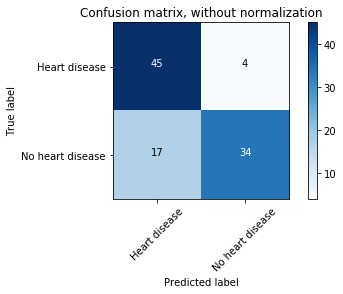

In [82]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(goal_test, lss_best.predict(heart_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Heart disease", "No heart disease"],
                      title='Confusion matrix, without normalization')
plt.show()

 performance metrics

-**Accuracy**: is the ratio between the number of correct predictions and total number of predications. 

$acc = \frac{TP + TN}{TP + TN + FP + FN}$

-**Precision**: is the ratio between the number of correct positives and the number of true positives plus the number of false positives.

$Precision (p) = \frac{TP}{TP + FP}$

-**Recall**: is the ratio between the number of correct positives and the number of true positives plus the number of false negatives.

$recall = \frac{TP}{TP + FN}$

-**F-score**: is known as the harmonic mean of precision and recall.

$acc = \frac{1}{\frac{1}{2}(\frac{1}{p}+\frac{1}{r})} = \frac{2pr}{p+r}$

-Problem characteristics in context of our case study:

TP = True positive (has heart disease).
TN = True negative (has no heart disease).
FP = False positive (has no heart disease)
FN = False negative (has heart disease)


In [84]:
#get the performance metrics
scores = ['accuracy', 'f1', 'precision', 'recall']

metrics = {score: cross_val_score(lss_best,heart_test, goal_test, scoring=score).mean() for score in scores}

metrics

{'accuracy': 0.7198455139631611,
 'f1': 0.803802733214498,
 'precision': 0.8166666666666668,
 'recall': 0.6862745098039215}

Probability for test data calculation

In [86]:
# predict heart disease for test dataset
y_pred_proba = lss_best.predict_proba(heart_test)
y_pred_proba = [x[1] for x in y_pred_proba]
for i in y_pred_proba[:10]:
    print (i)

6.757113262559026e-89
1.0
2.2084802309094117e-09
1.8385220838301273e-46
2.0139174869629494e-43
1.0
1.0
0.9999999999997455
1.0
1.1888325053309456e-48


In [87]:
# predict heart disease for test dataset
y_pred = lss_best.predict(heart_test)
y_pred[:25]

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [88]:
test_df = pnd.DataFrame(heart_test, columns = header_row[:-1])

test_df.loc[:, "Disease_probability"] = [x[1] for x in lss_best.predict_proba(heart_test)]
test_df.to_excel("disease_probability.xlsx", index = False)
test_df[:5]

,age,sex,chest_pain,blood pressure,serum_cholestoral,fasting_blood_sugar,electrocardiographic,max_heart_rate,induced_angina,ST_depression,slope,vessels,thal,Disease_probability
225,34.0,0.0,2.0,118.0,210.0,0.0,0.0,192.0,0.0,0.7,1.0,0.0,3.0,6.757113e-89
152,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1.000000e+00
228,54.0,1.0,4.0,110.0,206.0,0.0,2.0,108.0,1.0,0.0,2.0,1.0,3.0,2.208480e-09
201,64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0,1.838522e-46
52,44.0,1.0,4.0,112.0,290.0,0.0,2.0,153.0,0.0,0.0,1.0,1.0,3.0,2.013917e-43


 Features coefficients printing

In [91]:
# print weights for each X_k from the built  LSS model
warnings.filterwarnings('ignore')
w = lss_best.coef_[0]
a = -w[0] / w[1]
print ("Weight Coefficients")
coeff_df = pnd.DataFrame(columns = ['X_k', 'coeff'])
for c in range(len(heart.loc[:,'age':'thal'].columns)):
    coeff_df.loc[len(coeff_df)] = [heart.loc[:,'age':'thal'].columns[c], w[c]]
    
coeff_df

Weight Coefficients


,X_k,coeff
0,age,0.000000
1,sex,1.056141
2,chest_pain,7.742537
3,blood pressure,0.000000
4,serum_cholestoral,0.128630
5,fasting_blood_sugar,0.000000
6,electrocardiographic,0.000000
7,max_heart_rate,-1.881440
8,induced_angina,2.776616
9,ST_depression,9.770407


 Decision tree

In [94]:
# build Decision tree model
best_score_dt = 0

criterion = ['gini', 'entropy']

for c in criterion:             

            clf = tree.DecisionTreeClassifier(criterion=c)

            clf.fit(heart_train, goal_train)
            print("Decision tree Cross-Validation scores:")
            scores = cross_val_score(clf, heart.loc[:,'age':'thal'], heart.loc[:,'diag_int'], cv=10)
            print (scores)
            print("Mean Decision tree Cross-Validation score = ", np.mean(scores))

            if np.mean(scores) > best_score_dt:
                best_score_dt = np.mean(scores)
                best_param_dt = (c)
                    
    
print("The best parameters for model are ", best_param_dt)
print("The Cross-Validation score = ", best_score_dt)

Decision tree Cross-Validation scores:
[0.81 0.84 0.9  0.81 0.73 0.73 0.6  0.73 0.7  0.72]
Mean Decision tree Cross-Validation score =  0.7578976640711902
Decision tree Cross-Validation scores:
[0.84 0.81 0.77 0.84 0.7  0.7  0.57 0.77 0.73 0.72]
Mean Decision tree Cross-Validation score =  0.7448869113830182
The best parameters for model are  gini
The Cross-Validation score =  0.7578976640711902


In [95]:
# develop the model with the best parameters

lss_best_dt = tree.DecisionTreeClassifier(criterion = 'entropy')
lss_best_dt.fit(heart_train, goal_train)
print("Decision tree Test score:")
print(lss_best_dt.score(heart_test, goal_test))

Decision tree Test score:
0.74


Confusion matrix, without normalization
[[41  8]
 [18 33]]


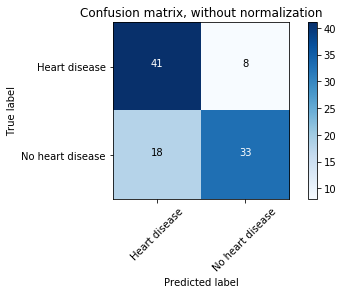

In [96]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(goal_test, lss_best_dt.predict(heart_test))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Heart disease", "No heart disease"],
                      title='Confusion matrix, without normalization')
plt.show()

In [97]:
visualize_tree(lss_best_dt, heart.loc[:,'age':'thal'].columns)

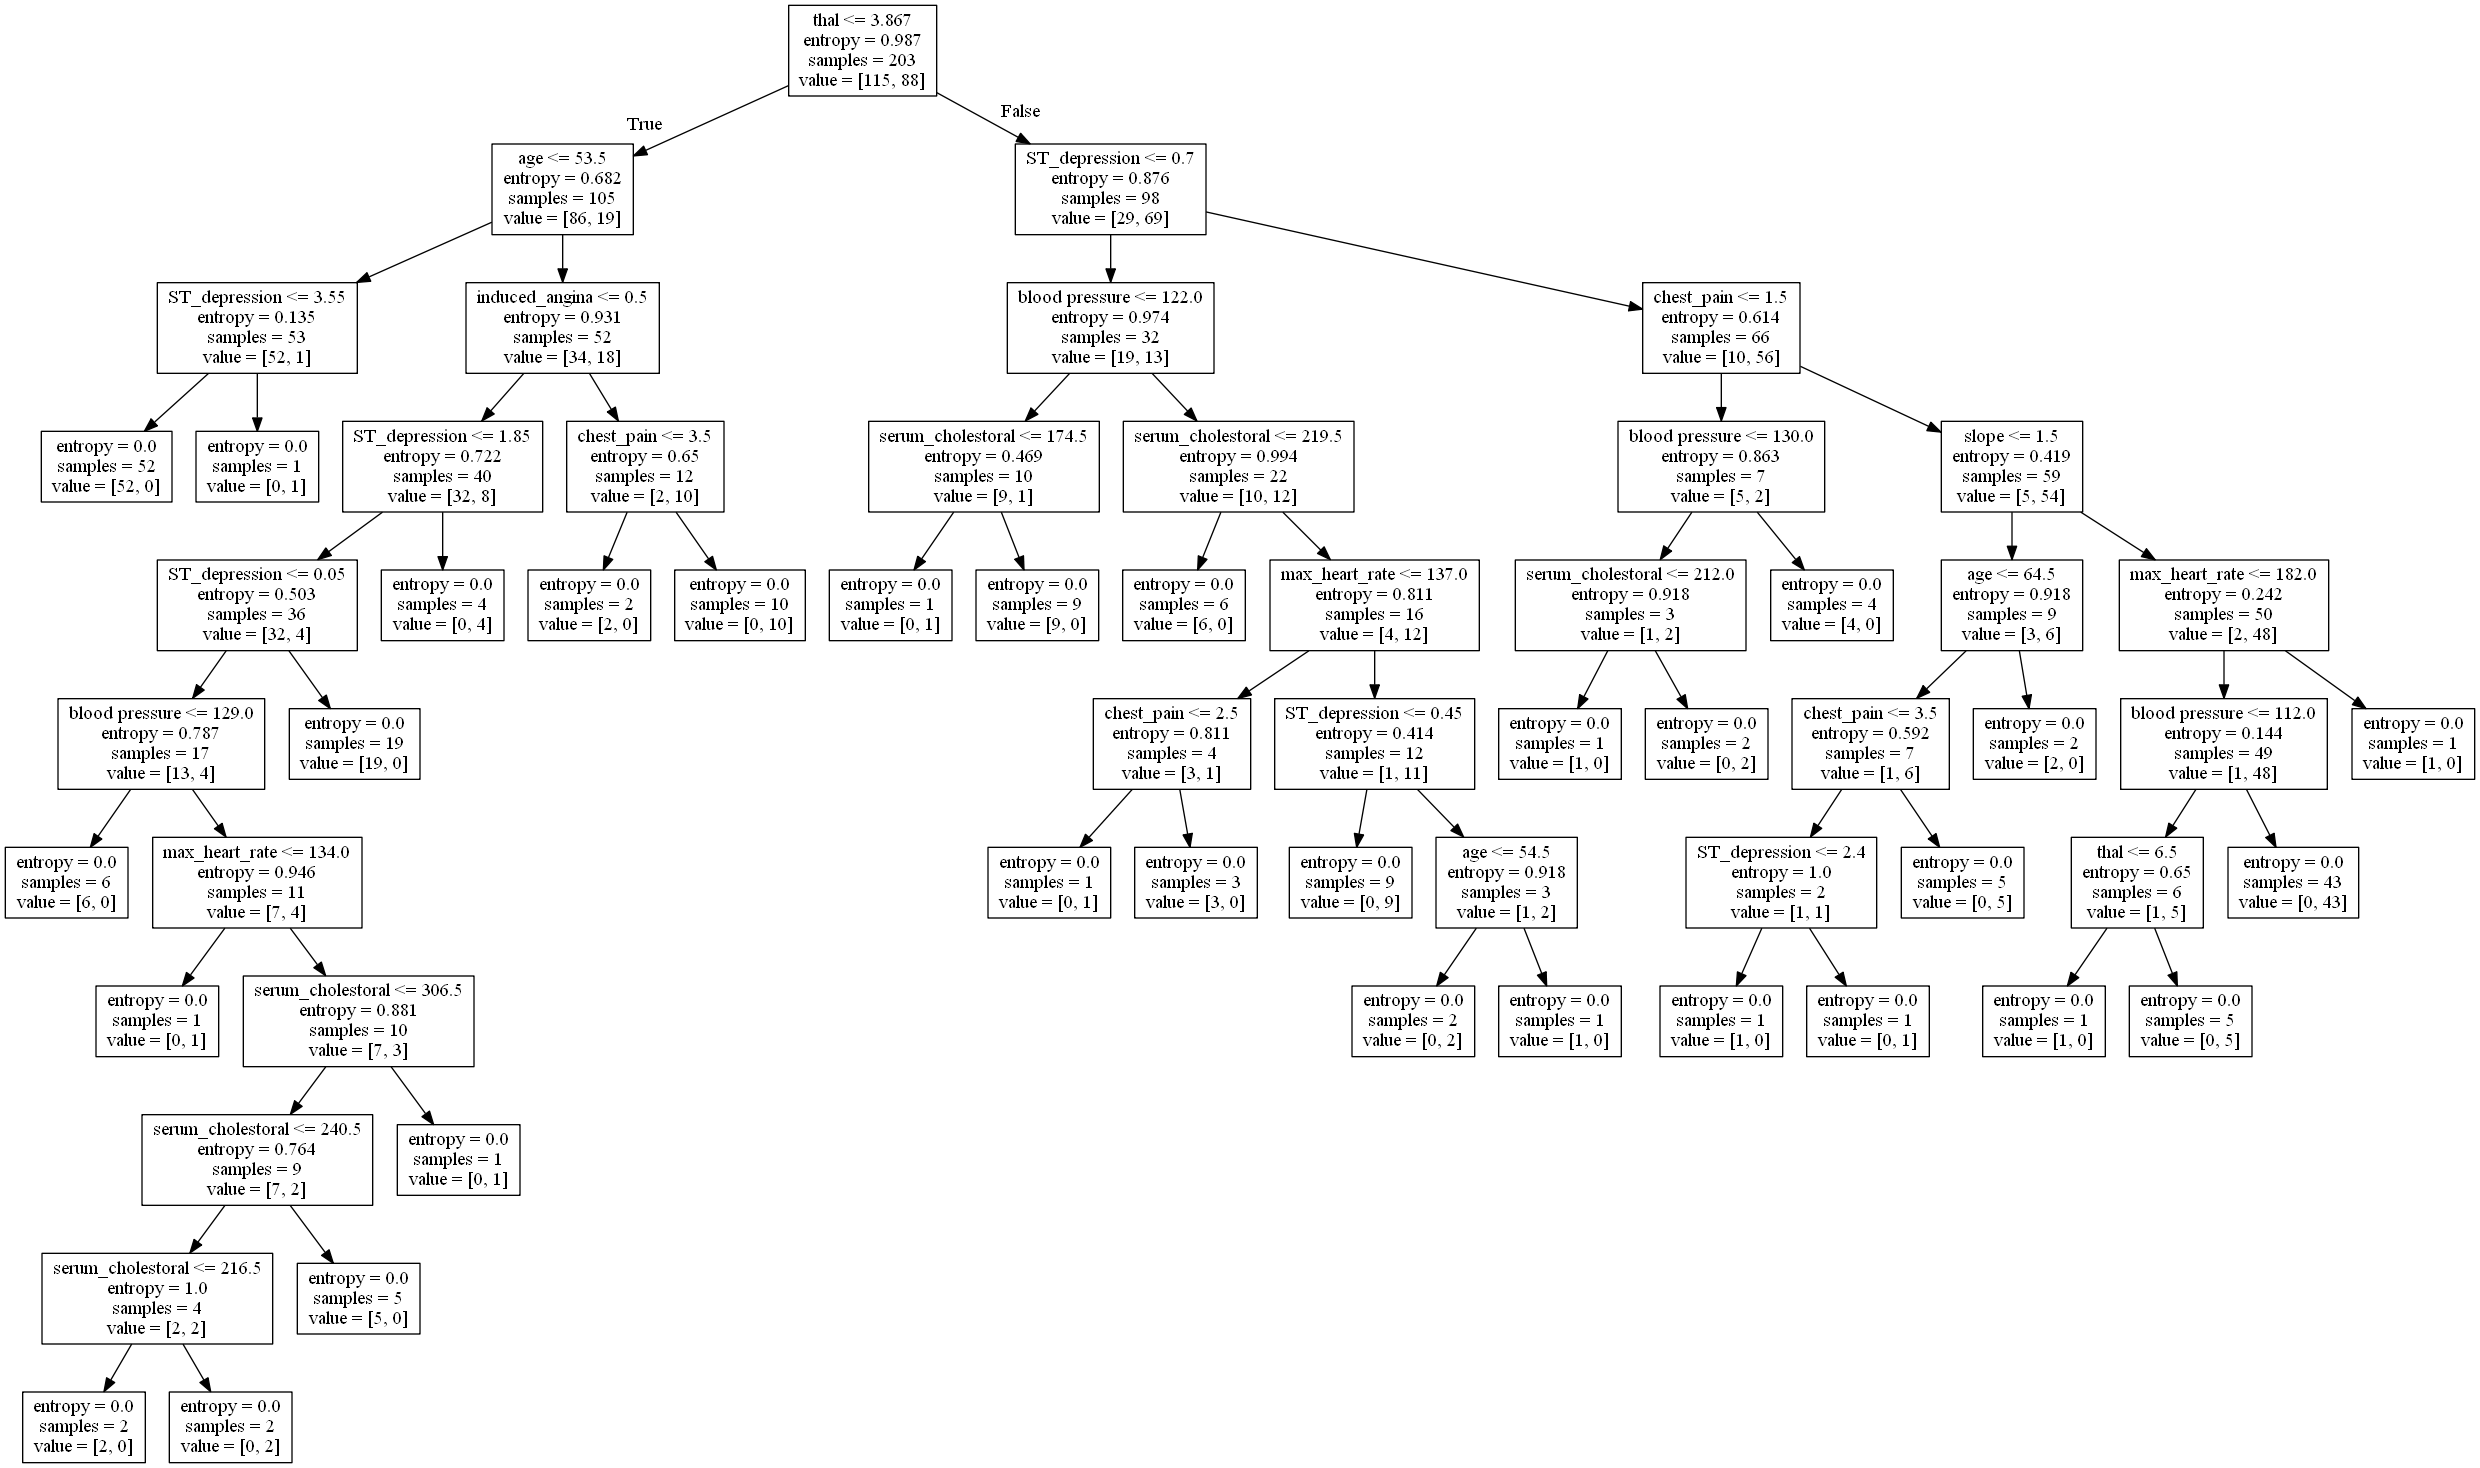

In [98]:
warnings.filterwarnings('ignore')
from IPython.display import Image  
import pydotplus 
dot_data = tree.export_graphviz(lss_best_dt)
graph = pydotplus.graphviz.graph_from_dot_file("dt.dot")
graph.write_pdf("dt.pdf")
Image(graph.create_png())

Return probabilities for each feature

In [100]:
# the probability of reaching each node for each X_k by using Decision trees

# print weights for each X_k from the built  LSS model
w = lss_best_dt.feature_importances_

prob_df = pnd.DataFrame(columns = ['X_k', 'P(X_k)'])
for c in range(len(heart.loc[:,'age':'thal'].columns)):
    prob_df.loc[len(prob_df)] = [heart.loc[:,'age':'thal'].columns[c], w[c]]
    
prob_df

,X_k,P(X_k)
0,age,0.114554
1,sex,0.000000
2,chest_pain,0.114479
3,blood pressure,0.070026
4,serum_cholestoral,0.125478
5,fasting_blood_sugar,0.000000
6,electrocardiographic,0.000000
7,max_heart_rate,0.057040
8,induced_angina,0.058448
9,ST_depression,0.204854


In [102]:
print ("Sum of dependent probabilities = " , prob_df["P(X_k)"].sum())

Sum of dependent probabilities =  1.0


 Develop a module to combine all the above modules in a sequential manner


In [115]:
def data_parsing(path):
    header_row = ['age','sex','chest_pain','blood pressure','serum_cholestoral','fasting_blood_sugar',\
               'electrocardiographic','max_heart_rate','induced_angina','ST_depression','slope','vessels','thal','diagnosis']

    # read csv file with Cleveland heart diseases data
    heart = pnd.read_csv(path, names=header_row)
    
    # we have unknown values '?'
    # change unrecognized value '?' into mean value through the column
    for c in heart.columns[:-1]:
        heart[c] = heart[c].apply(lambda x: heart[heart[c]!='?'][c].astype(float).mean() if x == "?" else x)
        heart[c] = heart[c].astype(float)
        
    
    # map dependent variable y = "diagnosis" into binary label
    # if "diagnosis" == 0, member does not have disease A - we put 0
    # if "diagnosis" >= 1, member possess the disease A - we put 1

    heart.loc[:, "diag_int"] = heart.loc[:, "diagnosis"].apply(lambda x: 1 if x >= 1 else 0)
    
    return heart


def subset_decomposition(data):
    # split dataset into train and test
    heart_train, heart_test, goal_train, goal_test = train_test_split(data.loc[:,'age':'thal'], \
                                                     data.loc[:,'diag_int'], test_size=0.33, random_state=0)
    return heart_train, heart_test, goal_train, goal_test

def model_building(heart):
    # add parameters for grid search
    loss = ["hinge", "log"]
    penalty = ["l1", "l2"]
    alpha = [0.05, 0.01]
    n_iter = [500, 1000]
    heart_train, heart_test, goal_train, goal_test = subset_decomposition(heart)
    # build the models with different parameters and select the best combination for the highest Accuracy
    best_score = 0
    best_param = (0,0,0,0)
    for l in loss:
        for p in penalty:
            for a in alpha:
                for n in n_iter:
                    #print("Parameters for model", (l,p,a,n))
                    lss = SGDClassifier(loss=l, penalty=p, alpha=a, n_iter=n)
                    lss.fit(heart_train, goal_train)
                    #print("Linear regression SGD Cross-Validation scores:")
                    scores = cross_val_score(lss, heart.loc[:,'age':'thal'], heart.loc[:,'diag_int'], cv=10)
                    #print scores
                    #print("Mean Linear regression SGD Cross-Validation score = ", np.mean(scores))

                    if np.mean(scores) > best_score:
                        best_score = np.mean(scores)
                        best_param = (l,p,a,n)


    print("The best parameters for model are ", best_param)
    print("The Cross-Validation score = ", best_score)

    # develop the model with the best parameters

    lss_best = SGDClassifier(loss='log', penalty='l1', alpha=0.05, n_iter=1000)
    lss_best.fit(heart_train, goal_train)
    print("Linear regression SGD Test score:")
    print(lss_best.score(heart_test, goal_test))  
    
   
    return lss_best

def self_prediction(heart_test, model):    
    # predict heart disease for test dataset
    y_pred_proba = model.predict_proba(heart_test)
    y_pred_proba = [x[1] for x in y_pred_proba]
    for i in y_pred_proba[:10]:
        print (i)
    return y_pred_proba



    
if __name__ == '__main__':
    heart = data_parsing(r'C:\Users\User\Desktop\dem\original_datasets\processed.cleveland.data.csv')
    model = model_building(heart)

The best parameters for model are  ('log', 'l1', 0.01, 500)
The Cross-Validation score =  0.8112532443455691
Linear regression SGD Test score:
0.8
